# Task 6b &ndash; Linear data fitting

## Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Preface
The task revolves around the polynomial $p(t) = 4t^3 - 4t$ on the interval $\left[ -2, 2 \right]$.

In [2]:
p = [4, 0, -4, 0]

### Point generation
#### Generate 101 equidistant values for $t$

In [3]:
df_points = pd.DataFrame()

df_points["t"] = np.linspace(-2, 2, num=101)

#### Generate corresponding values for $y$

First, we must generate the normally distributed variables $\eta_i$ with mean 0 and standard deviation 5.

In [4]:
df_points["n"] = np.random.normal(0, 5, 101)

Then, we can generate $y_i$ as $y_i = 4t_i^3 - 4t_i + \eta_i$.

In [5]:
df_points["y"] = 4 * df_points["t"]**3 - 4 * df_points["t"] + df_points["n"]

Now, let's plot our results:

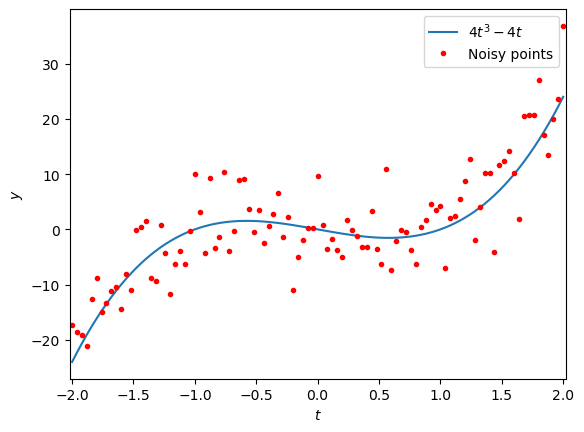

In [6]:
plt.plot(df_points["t"], np.polyval(p, df_points["t"]))
plt.xlim((-2.02, 2.02))
plt.plot(df_points["t"], df_points["y"], "r.")
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.legend(["$4t^3-4t$", "Noisy points"]);

## Task
### Part 1 &ndash; Fit with a cubic polynomial
#### Generate Vandermonde matrix

Let $A$ be a matrix with the sequence of all $1$'s, $t$, $t^2$ and $t^3$ as columns.

In [7]:
A = np.array([np.ones(101), df_points["t"], df_points["t"]**2, df_points["t"]**3]).T

#### Solve least squares

Let $\textbf{x} \in \mathbb{R}^4$ and $\textbf{y} \in \mathbb{R}^{101}$ - the sequence $y$ as a vector. We now need to solve the least squares problem for $A \textbf{x} \approx \textbf{y}$.

Let us first compute the matrix $A^TA$ and the vector $\textbf{y}$:

In [8]:
ATA = A.T @ A
y = np.array(df_points["y"])

We shall now verify the rank of $A$. Since it is a $101 \times 4$ matrix, we expect the value $4$ if it is full-rank.

In [9]:
print(np.linalg.matrix_rank(A))

4


The matrix is indeed full-rank, which means there is a unique solution to the system $A^TA \textbf{x} = A^T \textbf{y}$.

That solution is obviously $\textbf{x} = (A^TA)^{-1} A^T \textbf{y}$.

In [10]:
x = np.linalg.inv(ATA) @ A.T @ y

In [11]:
print(x)

[-0.31707276 -3.31794907  0.88321511  3.8879332 ]


Of course, we have to reverse $\textbf{x}$ to get our coefficients in the proper order.

In [12]:
reconstructedp = np.flip(x)

In [13]:
print(reconstructedp)

[ 3.8879332   0.88321511 -3.31794907 -0.31707276]


Fitting the noisy data with a cubic polynomial has yielded $4.56t^3-0.22t^2-5.36t$ (coefficients are presented as rounded to 2 digits after the decimal point, but are in fact not). Let us add this to our plot:

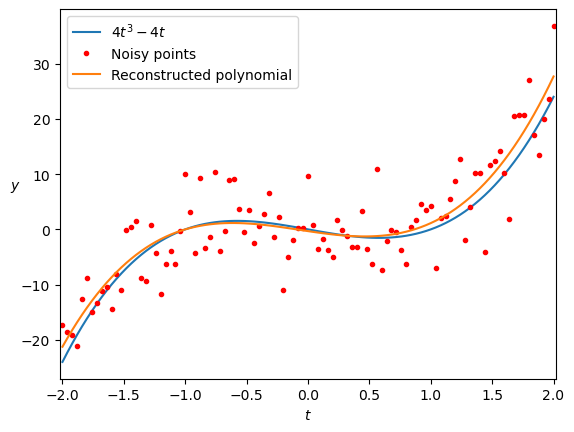

In [14]:
plt.plot(df_points["t"], np.polyval(p, df_points["t"]))
plt.xlim((-2.02, 2.02))
plt.plot(df_points["t"], df_points["y"], "r.")
plt.plot(df_points["t"], np.polyval(reconstructedp, df_points["t"]))
plt.xlabel("$t$")
plt.ylabel("$y$", rotation=0)
plt.legend(["$4t^3-4t$", "Noisy points", "Reconstructed polynomial"]);

Let us now plot over a wider interval to see whether our approximation holds up:

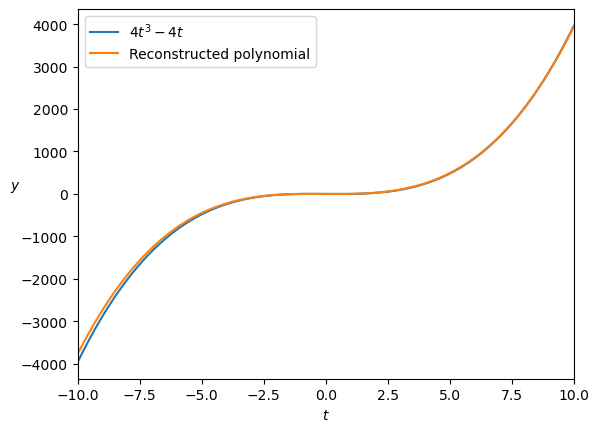

In [15]:
widet = np.linspace(-10, 10, num=1001)

plt.plot(widet, np.polyval(p, widet))
plt.plot(widet, np.polyval(reconstructedp, widet))
plt.xlim((-10, 10))
plt.xlabel("$t$")
plt.ylabel("$y$", rotation=0)
plt.legend(["$4t^3-4t$", "Reconstructed polynomial"]);

We see that the reconstructed polynomial is reasonably close to the original one.

### Part 2 &ndash; Fit with quadratic and linear polynomials

Let us first extract the corresponding columns of $A$ into two new matrices.

In [16]:
quadA = A[:, :3]
linA = A[:, :2]

We can reuse the $\textbf{y}$ vector, but we still need $A^TA$ for the two new cases.

In [17]:
quadATA = quadA.T @ quadA
linATA = linA.T @ linA

We can again verify the ranks of the Vandermonde matrices to confirm they are full-rank, and we see that they are:

In [18]:
print((np.linalg.matrix_rank(quadA), np.linalg.matrix_rank(linA)))

(3, 2)


We can now solve for our new polynomials:

In [19]:
quadx = np.linalg.inv(quadATA) @ quadA.T @ y
linx = np.linalg.inv(linATA) @ linA.T @ y

quadp = np.flip(quadx)
linp = np.flip(linx)

In [20]:
print(quadp)

[ 0.88321511  6.19846726 -0.31707276]


In [21]:
print(linp)

[6.19846726 0.88409979]


Finally, we can plot these lower-order approximations as well.

* On the original interval:

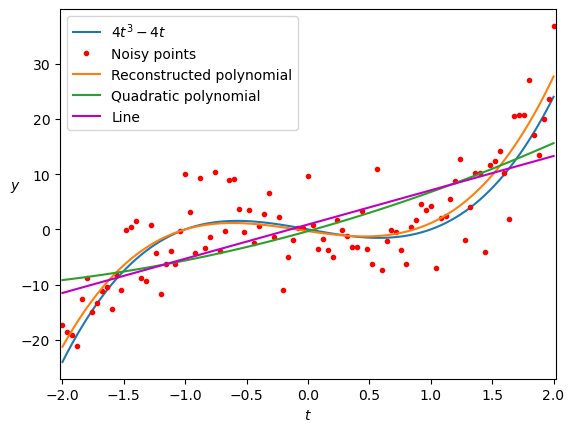

In [22]:
plt.plot(df_points["t"], np.polyval(p, df_points["t"]))
plt.xlim((-2.02, 2.02))
plt.plot(df_points["t"], df_points["y"], "r.")
plt.plot(df_points["t"], np.polyval(reconstructedp, df_points["t"]))
plt.plot(df_points["t"], np.polyval(quadp, df_points["t"]))
plt.plot(df_points["t"], np.polyval(linp, df_points["t"]), "m-")
plt.xlabel("$t$")
plt.ylabel("$y$", rotation=0)
plt.legend(["$4t^3-4t$", "Noisy points", "Reconstructed polynomial", "Quadratic polynomial", "Line"]);

* On the wider interval:

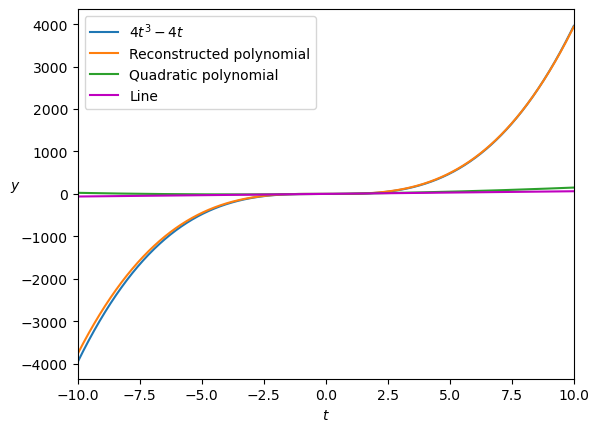

In [23]:
plt.plot(widet, np.polyval(p, widet))
plt.plot(widet, np.polyval(reconstructedp, widet))
plt.plot(widet, np.polyval(quadp, widet))
plt.plot(widet, np.polyval(linp, widet), "m-")
plt.xlim((-10, 10))
plt.xlabel("$t$")
plt.ylabel("$y$", rotation=0)
plt.legend(["$4t^3-4t$", "Reconstructed polynomial", "Quadratic polynomial", "Line"]);

The two new approximations almost coinciding is completely reasonable, as the best approximation of a cubic polynomial on an interval where its (only) inflection point lies in the middle, is not of even degree. In fact, the reason we got different polynomials for the quadratic and linear cases is the noise that we introduced to the points.